In [38]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [39]:
#load the data to data frame
dataFrame = pd.read_csv(r"C:\Users\ACER\Desktop\raw_data.csv")

In [40]:
# view the top five rows of the dataset
dataFrame.head()

,id,gender,dob,income,marital_status,city,last_purchase_date,score
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,27-05-1992,83451,Divorced,Colorado Springs,18-12-2020,653
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,NaN,New Orleans,2021-05-25,535


In [28]:
#viewing the last 5 rows, it also helps knowing how many rows are there
dataFrame.tail()

,id,gender,dob,income,marital_status,city,last_purchase_date,score
2564675,278d8e62-e08f-4ddc-9a2c-c1acafbff89c,Male,1975-04-26,20621,Widowed,Portland,2011-02-18,959
2564676,8d8591b5-f4d4-4a8d-b189-e6bde52ca3f4,Male,23-01-1983,13712,Married,Baltimore,2017-09-28,692
2564677,d026ad35-f992-43ca-918a-a760e43615be,Male,28-01-1976,62958,Widowed,Nashville,06-12-2015,471
2564678,a03048e4-ec77-4eca-8de2-2a6450e3c451,Female,1979-10-01,1082,Divorced,Milwaukee,2015-03-28,65
2564679,d189825b-aaff-47aa-9b75-826682a68828,Female,14-01-1988,48298,Widowed,Oklahoma City,2017-08-13,820


In [29]:
# there are 2564679 row and 8 collumn


<Figure size 1000x600 with 0 Axes>

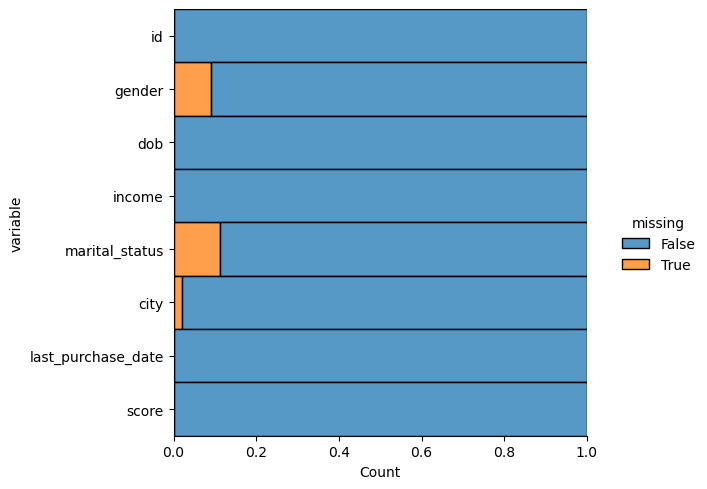

In [41]:
# visualizing the missing value using seaborn displot()
plt.figure(figsize=(10,6))
sns.displot(
    data=dataFrame.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


In [42]:
# so there are a lot of missing value, specially in the gender,marital_status and city
#it should be filled with some average or mode value or should remove the entire row for analysis

#replacing the missing value of each collumn with their respective mode
dataFrame.fillna(dataFrame.mode().iloc[0], inplace=True)

<Figure size 1000x600 with 0 Axes>

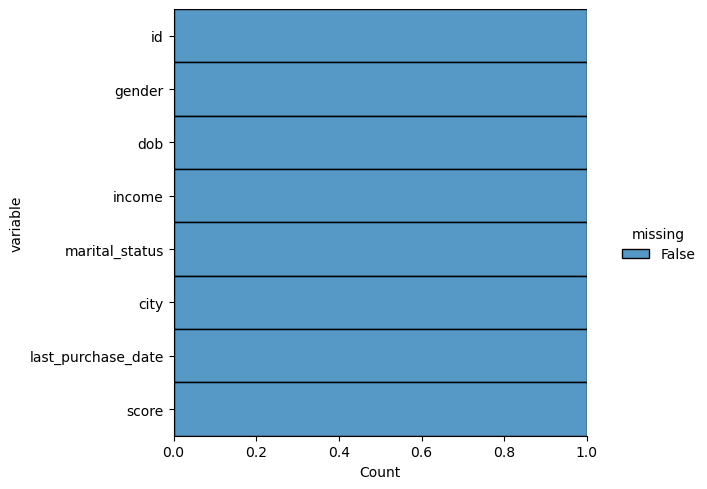

In [43]:
#after replacement
plt.figure(figsize=(10,6))
sns.displot(
    data=dataFrame.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


In [49]:
## Create a new collumn with their age based on dob

# Convert dob column to datetime object and also rearanging the date format 
dataFrame['dob'] = pd.to_datetime(dataFrame['dob'], infer_datetime_format=True)

# Calculate age based on current date and dob
today = pd.Timestamp.today()
dataFrame['age'] = (today - dataFrame['dob']).astype('<m8[Y]')

# View the updated DataFrame with "age" collumn
dataFrame.head()


,id,gender,dob,income,marital_status,city,last_purchase_date,score,age
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,45.0
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43,22.0
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,47.0
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,30.0
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Married,New Orleans,2021-05-25,535,35.0


In [50]:
## creating a new column "income_group" classifiying with the income

# calculating percentile cutoffs in 100/33 = 3 section 
income_percent = pd.qcut(dataFrame['income'], q=3, labels=['Low', 'Medium', 'High'])

# add the new column to the DataFrame
dataFrame['income_group'] = income_percent

# viewing
dataFrame.head()

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,45.0,Medium
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43,22.0,Low
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,47.0,Medium
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,30.0,High
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Married,New Orleans,2021-05-25,535,35.0,Medium


In [53]:
## in the same way categorizing customers into 3 section based on their score
## create a new column "score_group" classifiying with the score

# Create a new column "score_group" that categorizes customers into three groups based on their score
dataFrame['score_group'] = pd.qcut(dataFrame['score'], q=3, labels=['Poor', 'Fair', 'Good'])

# View the updated DataFrame
dataFrame.head()

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,45.0,Medium,Poor
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43,22.0,Low,Poor
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,47.0,Medium,Good
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,30.0,High,Fair
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Married,New Orleans,2021-05-25,535,35.0,Medium,Fair


In [59]:
## remove rows where last_purchase_date is before 2019 

# convert last_puchase_date into datetime object also remeber to take care of the format
dataFrame['last_purchase_date'] = pd.to_datetime(dataFrame['last_purchase_date'], infer_datetime_format=True)

# removing any rows where 'last_purchase_date' is before '2019-01-01'

dataFrame = dataFrame[dataFrame['last_purchase_date'] >= '2019-01-01']

dataFrame.tail()


,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
2564650,5df57d00-8f44-4d40-a406-63bdf1c0ad55,Male,1980-07-12,1205,Widowed,Virginia Beach,2021-02-15,786,42.0,Low,Good
2564653,58495d06-b11a-49fd-bdfb-1932f640b660,Male,1992-03-15,79590,Widowed,Fresno,2020-01-25,632,31.0,High,Fair
2564656,275aa672-c859-4d38-8dc3-2eb95e54ddd7,Female,1989-03-19,90919,Single,Phoenix,2021-08-20,764,34.0,High,Good
2564659,9b3c2cad-95af-42c5-b79e-3aab5cb977f4,Female,1984-02-11,96902,Widowed,Seattle,2021-11-06,161,39.0,High,Poor
2564671,ee27336c-fd12-4566-a9c6-a22a4f726493,Female,1997-11-16,91248,Single,Omaha,2019-05-15,358,25.0,High,Fair


In [63]:
# this process reduces some values
# saving the new data set not including the row numbers and also remember to use 'r' before directory for avoiding mistakes with escape
dataFrame.to_csv(r"C:\Users\ACER\Desktop\clean_data.csv", index=False)